In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/retail_sales.csv')

In [3]:
data['date'] = pd.to_datetime(data['data'])
data['sales'] = pd.to_datetime

In [4]:
data.head()

,data,venda,estoque,preco,date,sales
0,2014-01-01,0,4972,1.29,2014-01-01,<function to_datetime at 0x000002216329F798>
1,2014-01-02,70,4902,1.29,2014-01-02,<function to_datetime at 0x000002216329F798>
2,2014-01-03,59,4843,1.29,2014-01-03,<function to_datetime at 0x000002216329F798>
3,2014-01-04,93,4750,1.29,2014-01-04,<function to_datetime at 0x000002216329F798>
4,2014-01-05,96,4654,1.29,2014-01-05,<function to_datetime at 0x000002216329F798>


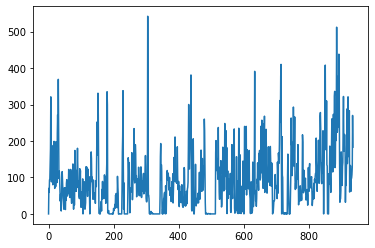

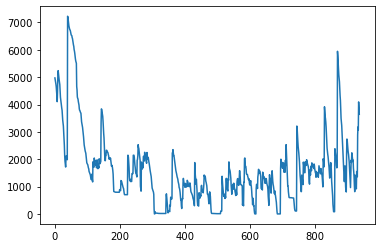

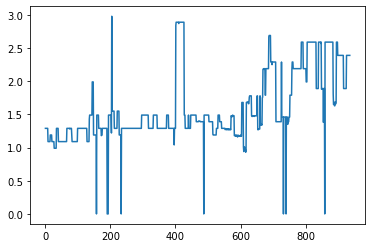

In [5]:
plt.plot(data['venda'])
plt.show()

plt.plot(data['estoque'])
plt.show()

plt.plot(data['preco'])
plt.show()

In [6]:
monthly = data.groupby(pd.Grouper(key='date', freq='MS')).sum().reset_index()
monthly.head()

,date,venda,estoque,preco
0,2014-01-01,3985,126737,34.50
1,2014-02-01,2018,132234,29.14
2,2014-03-01,2137,134419,34.70
3,2014-04-01,1990,59255,35.90
4,2014-05-01,2493,63117,41.73


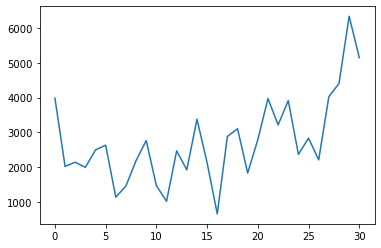

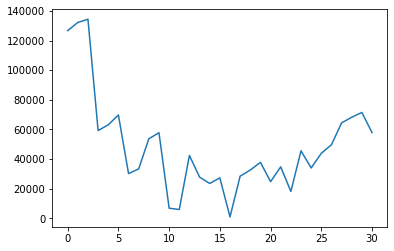

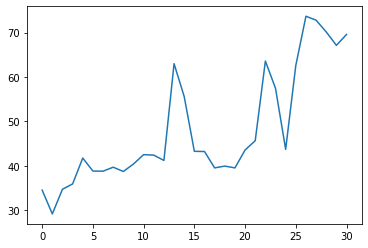

In [7]:
plt.plot(monthly['venda'])
plt.show()

plt.plot(monthly['estoque'])
plt.show()

plt.plot(monthly['preco'])
plt.show()

In [8]:
df = pd.DataFrame()
df['ds'] = monthly['date']
df['y'] = monthly['venda']

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


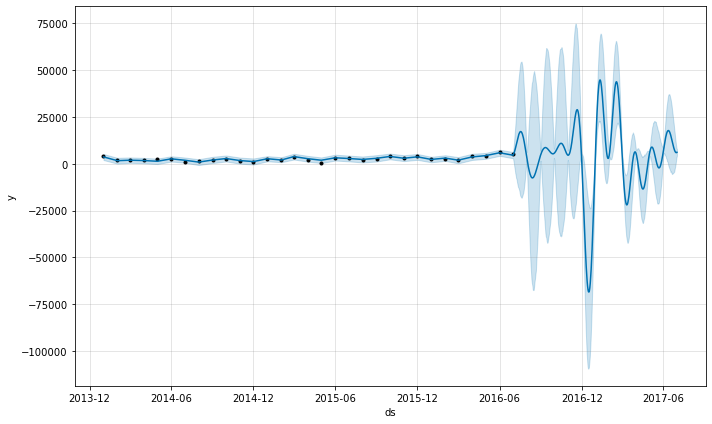

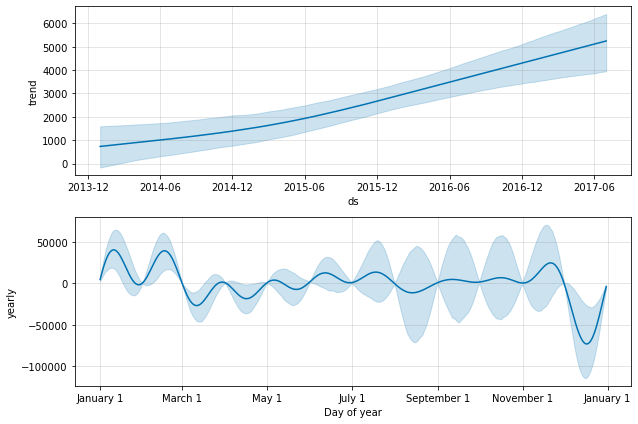

In [9]:
prophet = Prophet(mcmc_samples=300)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
# df_cv = cross_validation(prophet, initial='30 days', period='15 days', horizon = '90 days')
# df_p = performance_metrics(df_cv)
# fig = plot_cross_validation_metric(df_cv, metric='mape')
# plt.show()
# print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

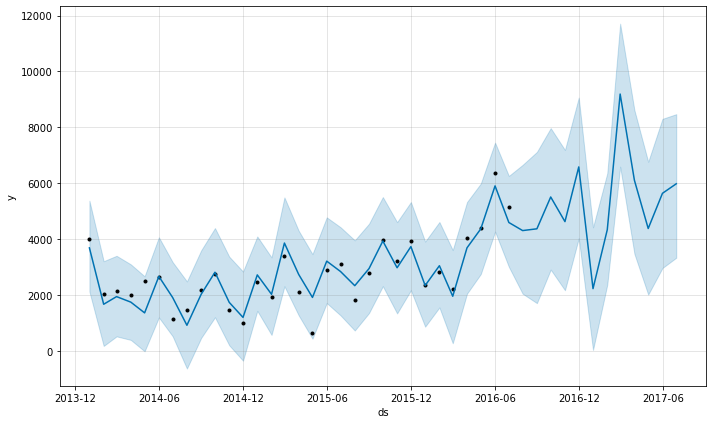

In [10]:
future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
# fig2 = prophet.plot_components(forecast)
# plt.show()